In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtpl

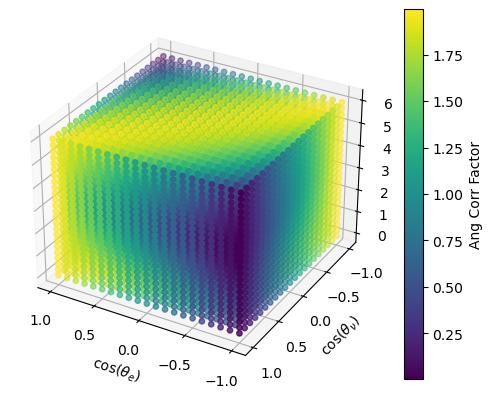

1.9948
0.0052


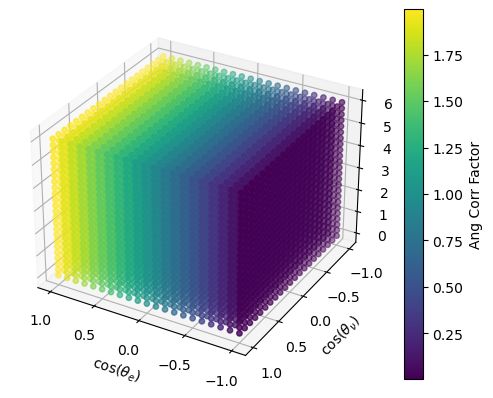

1.9948
0.0052


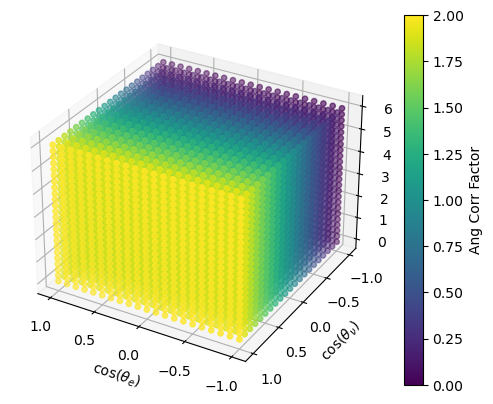

2.0
0.0


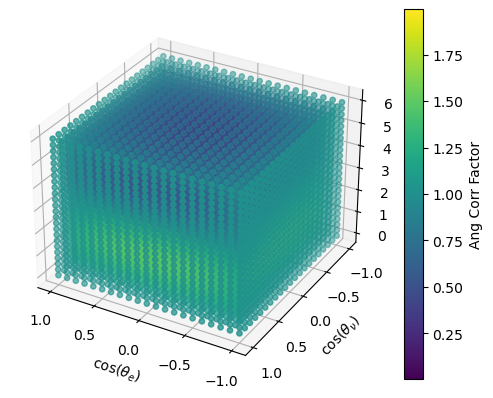

1.9948
0.0052


In [2]:
varNames = ["a","A","B","D"]

data_hash_simple = {}

do_ang = False

for name in varNames: 
    filename = f"build/{name}_simple_pos.txt"
    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)

    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    if do_ang:
        x = np.arccos(x)
        y = np.arccos(y)
    
    data_hash_simple[name] = [data,x,y,z]

    #print(data.shape)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),c = data.flatten(),s=15)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.view_init(azim=120)
    fig.colorbar(scat,label="Ang Corr Factor")
    plt.show()

    print(data.max())
    print(data.min())

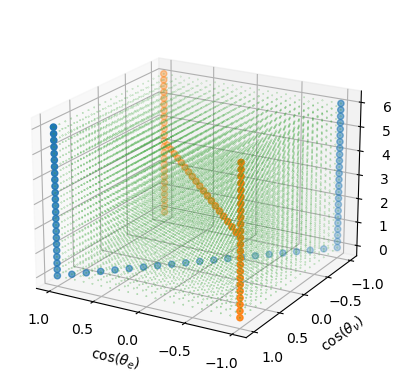

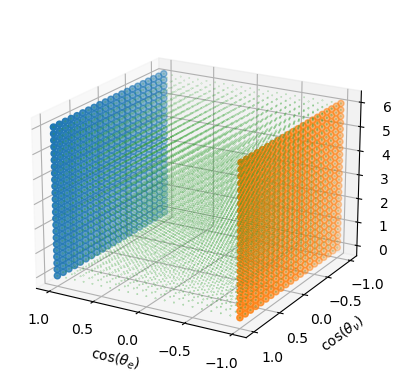

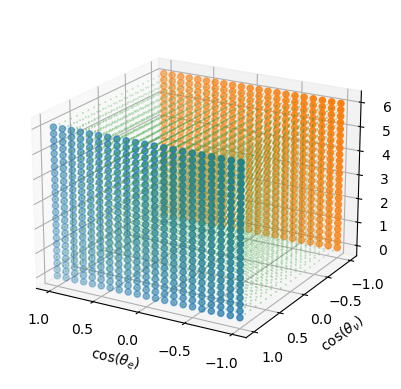

Position of maximum: [0.] [0.] [1.57079633]
Position of minimum: [0.] [0.] [4.71238898]


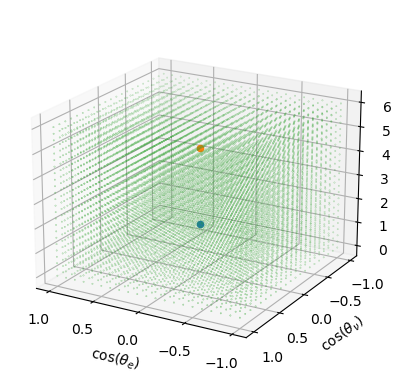

In [3]:
for name in varNames:         
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    data, x, y ,z = data_hash_simple[name]
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.view_init(elev=20,azim=120)
    if name == "D":
        print("Position of maximum:",x[max_mask],y[max_mask],z[max_mask])
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20)
    min_mask = np.where(data==data.min())
    if name == "D":
        print("Position of minimum:",x[min_mask],y[min_mask],z[min_mask])
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20)   
    ax.scatter(x.flatten(),y.flatten(),z.flatten(),s=0.05)
    plt.show()


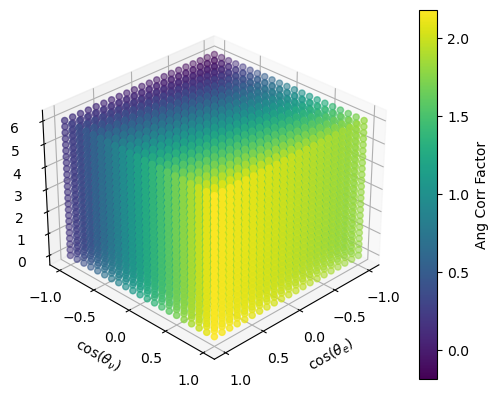

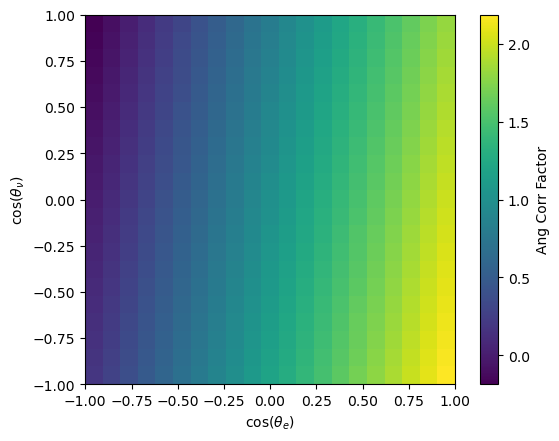

2.1853
-0.1853


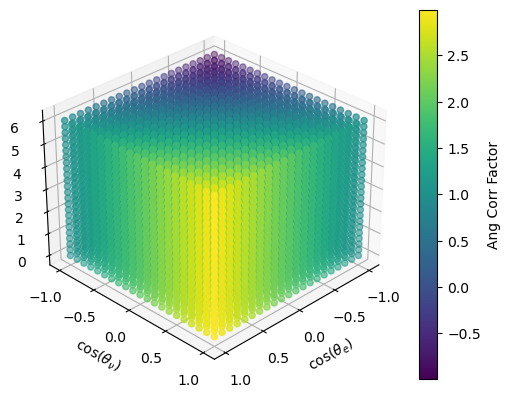

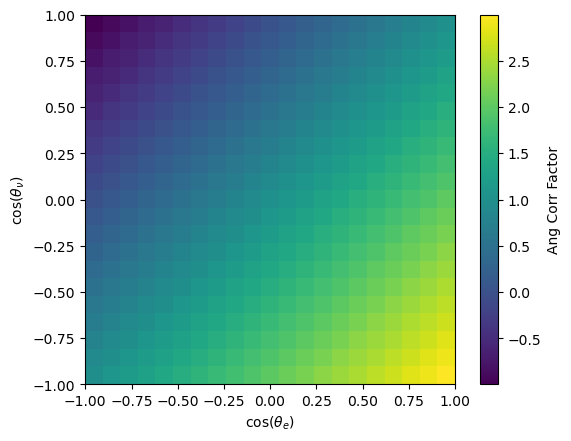

2.9948
-0.9948


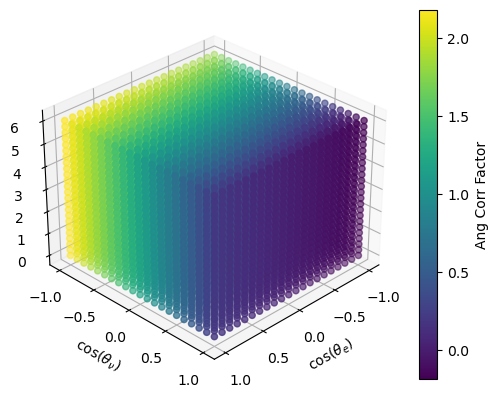

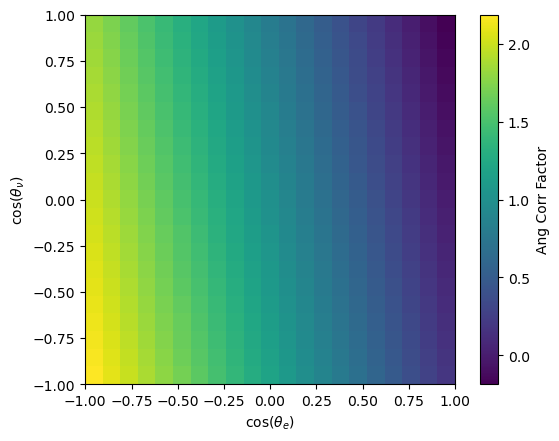

2.1853
-0.1853


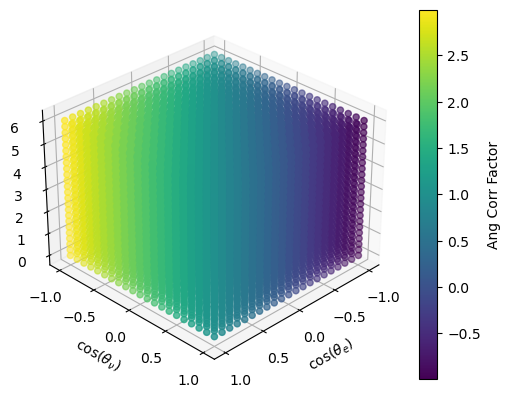

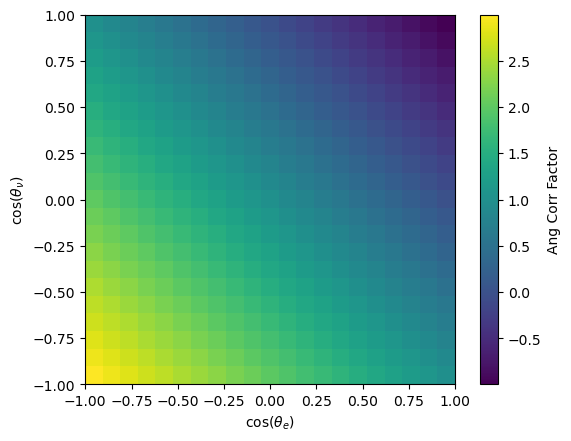

2.9948
-0.9948


In [7]:
fileNames = ["build/posA_posB_lowE.txt","build/posA_posB_hiE.txt",
             "build/posA_negB_lowE.txt","build/posA_negB_hiE.txt"]

do_ang = False

for filename in fileNames:    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)

    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    
    #print(data.shape)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),c = data.flatten(),s=20)
    fig.colorbar(scat,label="Ang Corr Factor")
    plt.show()
    fig, ax = plt.subplots()
    im2d = ax.imshow(data[:,:,0],extent=(-1,1,-1,1))
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    fig.colorbar(im2d,label="Ang Corr Factor")
    plt.show()
    print(data.max())
    print(data.min())
    

(21, 21, 24)


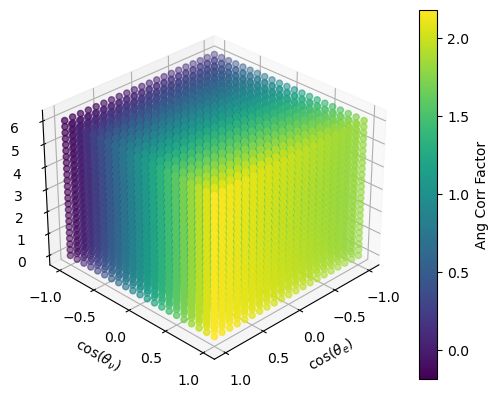

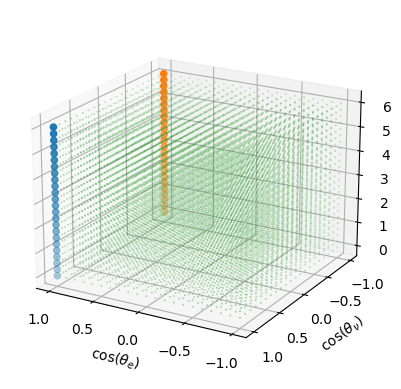

2.1853
-0.1853
(21, 21, 24)


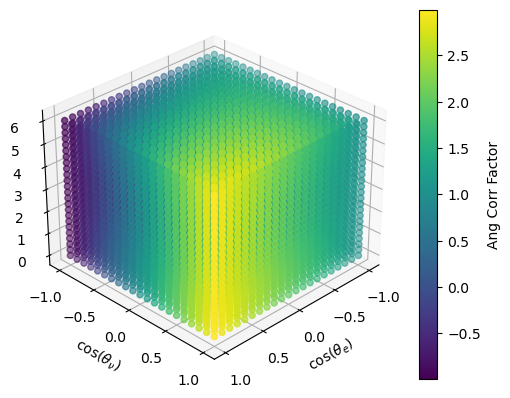

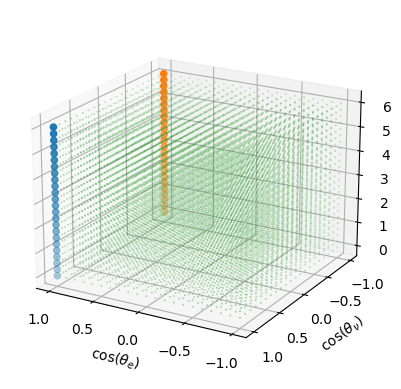

2.9948
-0.9948
(21, 21, 24)


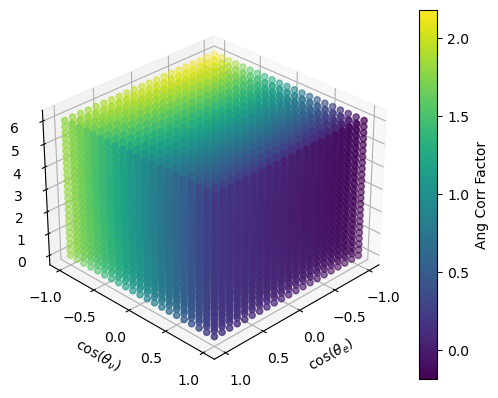

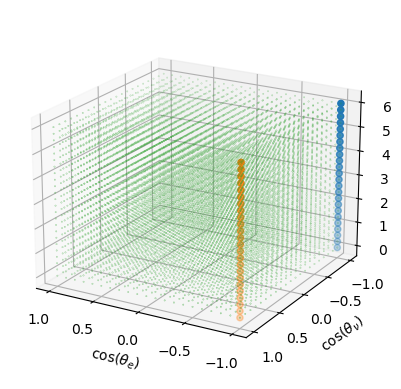

2.1853
-0.1853
(21, 21, 24)


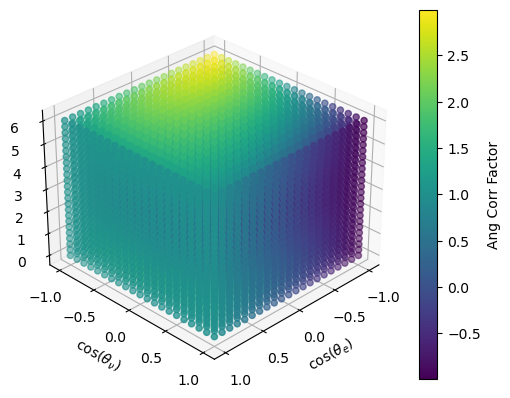

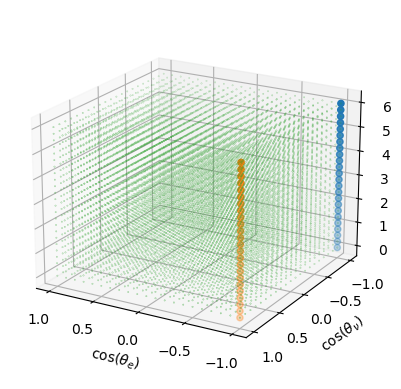

2.9948
-0.9948


In [8]:
fileNames = ["build/posa_posB_lowE.txt","build/posa_posB_hiE.txt",
             "build/posa_negB_lowE.txt","build/posa_negB_hiE.txt"]

for filename in fileNames:    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)
    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    
    print(data.shape)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),c = data.flatten(),s=20)
    fig.colorbar(scat,label="Ang Corr Factor")
    plt.show()
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.view_init(elev=20,azim=120)
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20)
    min_mask = np.where(data==data.min())
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20)   
    ax.scatter(x.flatten(),y.flatten(),z.flatten(),s=0.05)
    plt.show()    
    print(data.max())
    print(data.min())


(81, 81, 24)


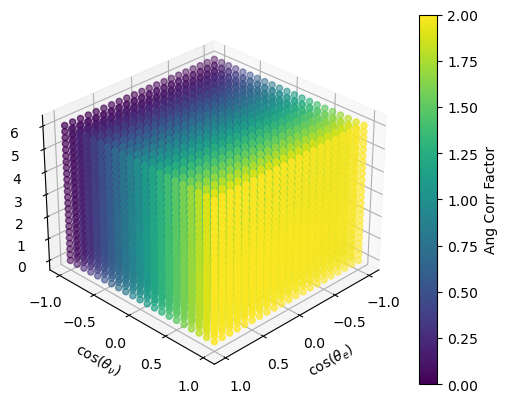

Position of maximum: [-0.025  0.     0.025] [0.975 0.975 0.975] [1.57079633 1.57079633 1.57079633]
Position of minimum: [-0.025  0.     0.025] [-0.975 -0.975 -0.975] [4.71238898 4.71238898 4.71238898]


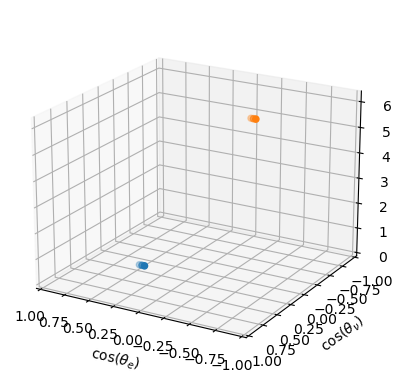

2.0162
-0.0162


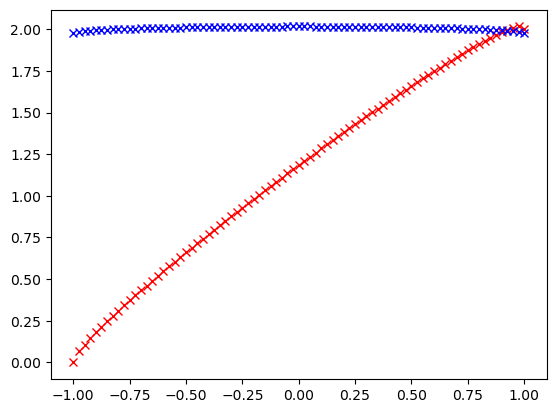

(81, 81, 24)


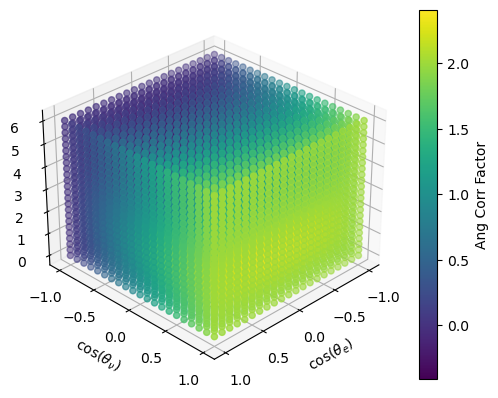

Position of maximum: [0.] [0.7] [1.57079633]
Position of minimum: [0.] [-0.7] [4.71238898]


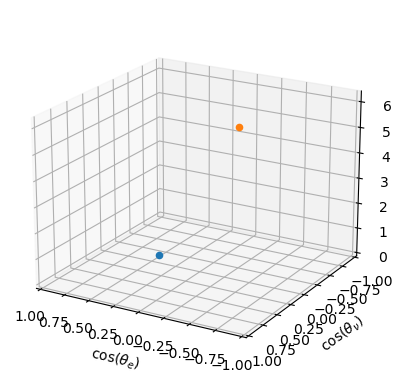

2.4104
-0.4104


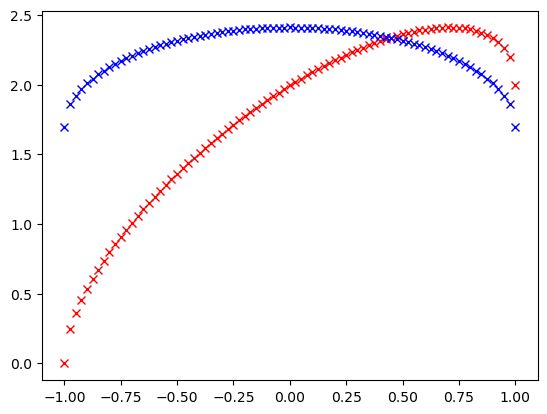

(81, 81, 24)


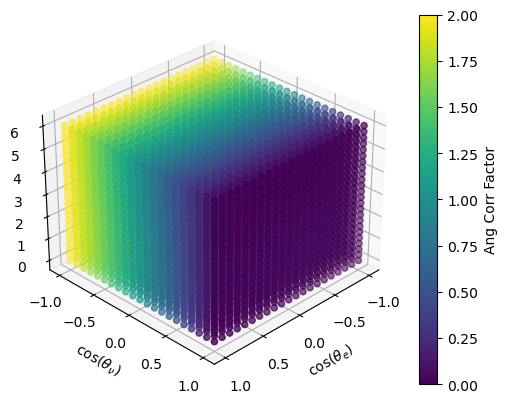

Position of maximum: [-0.025  0.     0.025] [-0.975 -0.975 -0.975] [1.57079633 1.57079633 1.57079633]
Position of minimum: [-0.025  0.     0.025] [0.975 0.975 0.975] [4.71238898 4.71238898 4.71238898]


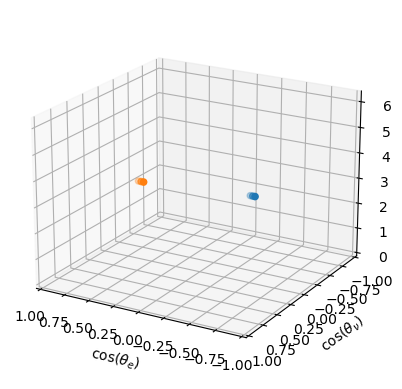

2.0162
-0.0162


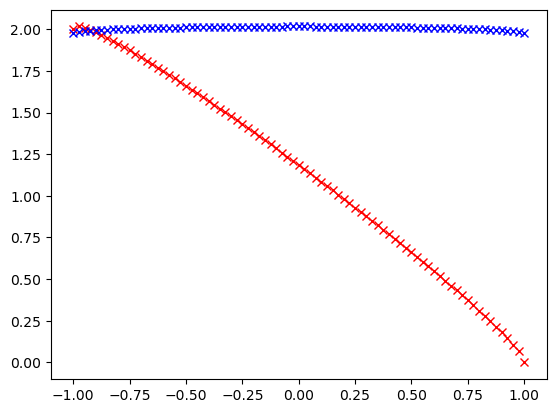

(81, 81, 24)


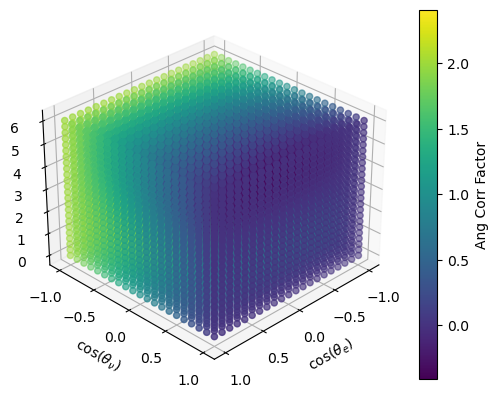

Position of maximum: [0.] [-0.7] [1.57079633]
Position of minimum: [0.] [0.7] [4.71238898]


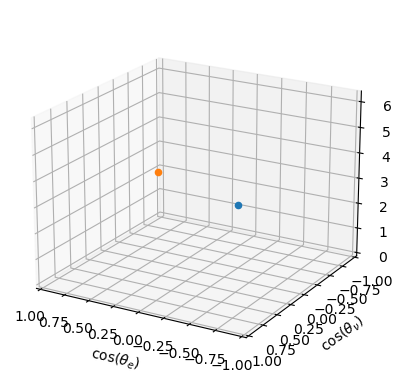

2.4104
-0.4104


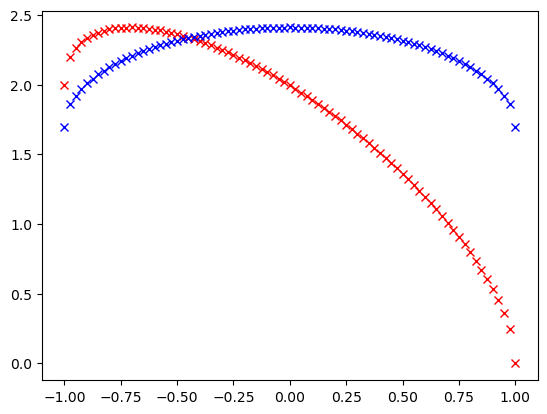

In [6]:
fileNames = ["build/posD_posB_lowE.txt","build/posD_posB_hiE.txt",
             "build/posD_negB_lowE.txt","build/posD_negB_hiE.txt"]

for filename in fileNames:    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)
    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    
    print(data.shape)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    scat = ax.scatter(x[::4,::4,:].flatten(),y[::4,::4,:].flatten(),z[::4,::4,:].flatten(),
                        c = data[::4,::4,:].flatten(),s=20)

    fig.colorbar(scat,label="Ang Corr Factor")
    plt.show()
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    max_mask = np.where(data==data.max())
    ax.set_xlabel("$\\cos(\\theta_e)$")
    ax.set_ylabel("$\\cos(\\theta_\\nu)$")
    ax.set_zlabel("$\\phi$")
    ax.view_init(elev=20,azim=120)
    print("Position of maximum:",x[max_mask],y[max_mask],z[max_mask])
    ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20)
    min_mask = np.where(data==data.min())
    print("Position of minimum:",x[min_mask],y[min_mask],z[min_mask])
    ax.scatter(x[min_mask].flatten(),y[min_mask].flatten(),z[min_mask].flatten(),s=20)   
    ax.set_xlim3d([-1,1])
    ax.set_ylim3d([-1,1])
    ax.set_zlim3d([0,2*np.pi])
    plt.show()    
    print(data.max())
    print(data.min())
    line_y_max = data[max_mask[0][0],:,max_mask[2][0]]
    plt.plot(np.linspace(-1,1,z_vals),line_y_max,'rx')
    line_x_max = data[:,max_mask[1][0],max_mask[2][0]]
    plt.plot(np.linspace(-1,1,z_vals),line_x_max,'bx')
    plt.show()